Python Plotting Tutorial
=======

What's covered
-----

  * Basic plotting using the matplotlib.pyplot package
  * Installation and invocation tips
  * Intro to styling and customization
  * Pointers to other packages


For the truly impatient
=========

Here is a very quick "hello world".

First -- import matplotlib.pyplot (see further down for the *safer* way to do this) and tell ipython to do the plotting in the gui window.

In [1]:
from numpy import *
from matplotlib.pyplot import *

Tell Jupyter to render the plot in the notebook.

In [2]:
%matplotlib inline

Next, set up the things you want to plot

In [3]:
x = linspace(-2*pi,2*pi,100) # 100 data points spaced linearly
y = cos(x)

Now plot them and label a few things

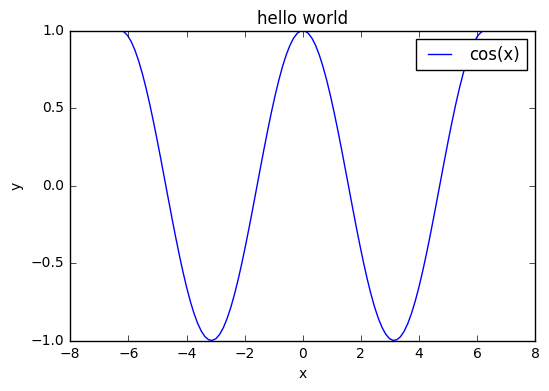

In [4]:
plot(x,y,label="cos(x)")
xlabel("x")
ylabel("y")
title("hello world")
legend()
savefig('hello_world.pdf') # Save this as a pdf file

Useful references
------
 
 * [Plotting commands summary](http://matplotlib.org/api/pyplot_summary.html)
 * [Gallery](http://matplotlib.org/gallery.html)
 * [astroplotlib](http://astroplotlib.stsci.edu/page_simple.htm) sample plots in both IDL and Python

STOP
====

The example above saves typing, but can lead to "namespace" clashes, and makes it harder to copy code from the notebook to a script for use in "production".
The *now standard* way to do the imports of numpy and matplotlib are in the cell below. 

Now do the imports and give them their standard names `np` and `plt`

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats # We'll use this to make some random distributions for examples

Now let's make sure everyone is using the matplotlib default settings

In [ ]:
from matplotlib import rcdefaults
rcdefaults()

There are different ways to invoke matplotlib, depending on how you are using python. Here's a quick summary:

| Environment       |       Command              | Rendering           |
|-------------------|----------------------------|---------------------|
| python shell:     | ```plt.ion()```            | Separate GUI        |
| ipython shell:    | ```plt.ion()```            | Separate GUI        |
| jupyter notebook: | ```%matplotlib inline```   | Non-GUI inline      |
| jupyter notebook: | ```%matplotlib notebook``` | GUI inline          |

We'll use the ```%matplotlib inline``` option, which doesn't give you the GUI.


In [ ]:
%matplotlib inline

In [ ]:
x = np.linspace(-2*np.pi,2*np.pi,100)
y = np.cos(x)
plt.plot(x,y,label="cos(x)")

A few other common examples
========

A colorful scatter plot. Lots of [colormaps](http://matplotlib.org/examples/color/colormaps_reference.html) available
 


In [ ]:
x = np.linspace(-2*np.pi,2*np.pi,500)
signal = np.cos(x)
noise = stats.norm().rvs(signal.shape) # Gets random deviates with a Gaussian distribution
plot(x,signal,label='cos(x)',linewidth=2) # Setting the linewidth as well as the label
scatter(x,signal+noise,label='random deviates',c=np.abs(noise),alpha=0.5) # Setting color and transparency
plt.colorbar(label='residual')
plt.ylim(-5,5)
plt.legend()

A histogram. Three different examples are shown. (Uncomment the commented lines and rerun the cell to experiment):

  * a normalized histogram with the default binning and transparency set to 0.5
  * a non-normalized histogram with custom binning from -4 to 4 in steps of 0.1 
  * the same, but without the lines between the bins

In [ ]:
n,bins,patches = plt.hist(noise,normed=True,alpha=0.5) 
# n,bins,patches = plt.hist(noise,np.arange(-4,4.,0.1),alpha=0.5) 
# n,bins,patches = plt.hist(noise,np.arange(-4,4.,0.1),alpha=0.5,edgecolor='none') 
plt.plot(x,stats.norm().pdf(x))
plt.xlim(-4,4)

An image. We'll make a simulated field with two pixels lit up.

In [ ]:
img = np.zeros((30,30),dtype=np.float64) # Set up an empty array
img[5,25] = 100
img[15,15] = 200
plt.imshow(img)
plt.colorbar()
plt.ylabel('row')
plt.xlabel('column')

When displaying images read in from FITS files, you will often want to 
 * Choose a different colormap (use plt.colormap() to see them)
 * Set the minimum and maximum of the colormap
 * Choose a different interpolation method to avoid smoothing
 * Transpose the two axes so that the fastest varying index running horizontally
 * Set the origin to be at the lower left
 
To avoid confusion, get in the habit of thinking: `img[row,col]` rather than `img[x,y]`

In [ ]:
plt.imshow(img.T,cmap=plt.cm.gray,vmin=-20,vmax=200.,interpolation='nearest',origin='lower')
plt.colorbar()
plt.xlabel('FITS first axis (x)')
plt.ylabel('FITS second axis (y)')
plt.title('ds9 orientation')

Everything is an object
============
You can happily simple make plots ignoring the object-oriented interface to matplotlib. But eventually you will need to adjust something that requires you to understand this. So let's do some styling on the first example.

In the example below, fig is an instance of an object of the plt.figure class and ax is an instance of the axis class. You can use ipython to do a lot of introspection into these classes to find out their methods.

In [ ]:
fig = plt.figure() 
ax = fig.add_subplot(1,1,1)
line, = ax.plot(x,signal,label='cos(x)') 
# Note the comma in the line above. 
# This is because ax.plot returns a tuple; in this case there is just one element 

In [ ]:
help(line)

Now we can adjust things after having made the basic plot. Start with the linewith and color. 

In [ ]:
line.set_linewidth(2)
line.set_color('g')
fig

Label the axes, using LaTex formatting

In [ ]:
ax.set_ylabel(r"$\cos(\theta)$")
ax.set_xlabel(r"$\theta ({\rm radians})$")
ax.xaxis.label.set_fontsize(20)
ax.set_xlim(-6,6)
fig

Add a second axis at the top. 

In [ ]:
ax2 = ax.twiny() # This function puts a second axis at the top
degrees = 180.*x/np.pi
topticks = [] # Set up an empty list for the top ticks
for t in ax.get_xticks():
    topticks += [180.*t/np.pi] # Convert to degrees
ax2.set_xticks(topticks)
ax2.set_xlabel(r'$\theta ({\rm degrees})$',fontsize=20)
fig

Subplots. Here's the simplest way to do them. There are much fancier ways and you can lock the axes, which is quite handy in the interactive GUI.
  
  * [subplots examples](http://matplotlib.org/examples/pylab_examples/subplots_demo.html)
  * [gridspec examples](http://matplotlib.org/users/gridspec.html) more complex, but more flexible than subplots.

In [ ]:
plt.subplot(2,1,1)
plt.plot(x,signal)
plt.subplot(2,1,2)
plt.plot(x,signal/(1+signal**2))

Matplotlib styles
---------

Matplotlib now has [customizable styles](http://matplotlib.org/users/style_sheets.html). 

In [ ]:
from matplotlib import style
style.available

Let's try the Grammar of Graphics style popular in R

In [ ]:
plt.style.use('ggplot')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(x,signal,label='cos(x)')
ax.set_xlabel(r'$\theta ({\rm radians})$')

There's even an [XKCD](http://xkcd.com) emulator. You must supply your own humor.

In [ ]:
plt.style.use('classic')
plt.xkcd()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(x,signal,label='cos(x)')
ax.set_xlim(-1,5)
ax.set_ylim(-1.2,1.2)

In [ ]:
ax.set_ylabel('level of attention')
ax.text(0.5,1.0,"Coffee")
ax.text(3.2,-0.5,"Look, a squirrel!",horizontalalignment='center')
fig

We should really remove the axis labeling...

In [ ]:
plt.setp(ax.get_xticklabels(),visible=False)
plt.setp(ax.get_xticklines(),visible=False)
fig

A Couple other Python plotting packages
--------------

 * [pyqtgraph](http://www.pyqtgraph.org) Higher performance for large datasets and building GUIs
 * [bokeh](http://bokeh.pydata.org) Aimed at browser-based visualization of large data sets
 